In [1]:
import numpy as np
import pandas as pd
import wrangle
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [2]:
#get data
df = wrangle.get_telco_tenure()

In [3]:
#clean data
df = wrangle.clean_telco_tenure(df)

In [4]:
#split data
train, validate ,test = wrangle.telco_split(df)

train(949, 4),validate(407, 4),test(339, 4)


In [5]:
#create X_train, X_validate, X_test
X_train = train.drop(columns='customer_id')
X_validate = validate.drop(columns='customer_id')
X_test = test.drop(columns='customer_id')

In [6]:
#set up scalers
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
min_max_scaler.fit(X_train)
robust_scaler.fit(X_train)

RobustScaler()

In [7]:
#scale data both ways
mmX_train_scaled = min_max_scaler.transform(X_train)
rX_train_scaled = robust_scaler.transform(X_train)

mmX_validate_scaled = min_max_scaler.transform(X_validate)
rX_validate_scaled = robust_scaler.transform(X_validate)

mmX_test_scaled = min_max_scaler.transform(X_test)
rX_test_scaled = robust_scaler.transform(X_test)

In [8]:
#create new df for scaler dataframes
mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
mmX_validate_scaled = pd.DataFrame(mmX_validate_scaled, columns=X_validate.columns)
mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)

rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
rX_validate_scaled = pd.DataFrame(rX_validate_scaled, columns=X_validate.columns)
rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)

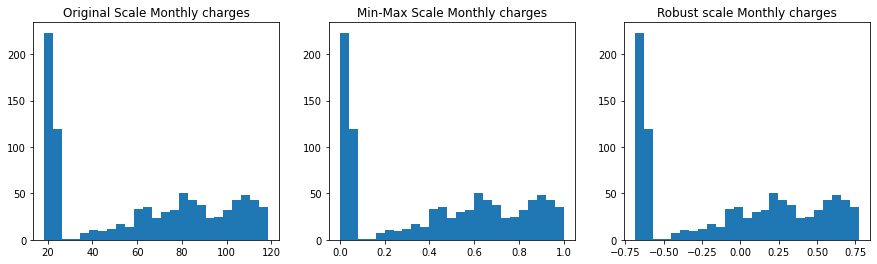

In [9]:
#scale monthly charges
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.hist(train.monthly_charges,bins=25)
plt.title("Original Scale Monthly charges")
plt.subplot(132)
plt.hist(mmX_train_scaled.monthly_charges, bins = 25)
plt.title("Min-Max Scale Monthly charges")
plt.subplot(133)
plt.hist(rX_train_scaled.monthly_charges, bins = 25)
plt.title("Robust scale Monthly charges")
plt.show()


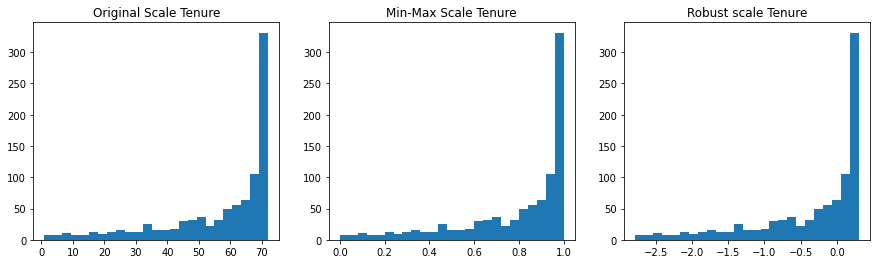

In [10]:
#scale tenure
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.hist(train.tenure,bins=25)
plt.title("Original Scale Tenure")
plt.subplot(132)
plt.hist(mmX_train_scaled.tenure, bins = 25)
plt.title("Min-Max Scale Tenure")
plt.subplot(133)
plt.hist(rX_train_scaled.tenure, bins = 25)
plt.title("Robust scale Tenure")
plt.show()



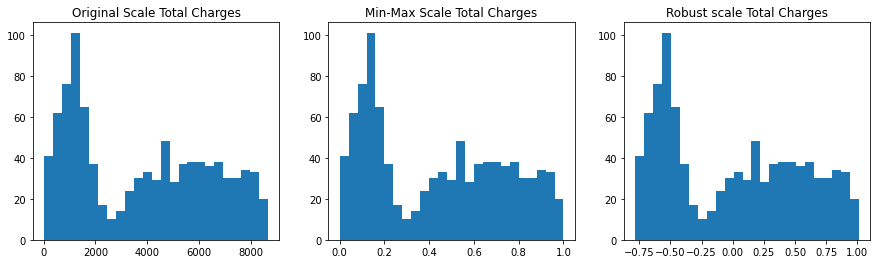

In [11]:
#scale total charges
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.hist(train.total_charges,bins=25)
plt.title("Original Scale Total Charges")
plt.subplot(132)
plt.hist(mmX_train_scaled.total_charges, bins = 25)
plt.title("Min-Max Scale Total Charges")
plt.subplot(133)
plt.hist(rX_train_scaled.total_charges, bins = 25)
plt.title("Robust scale Total Charges")
plt.show()

In [12]:
# apply inverse_transorm, is it the same as original, answer: yes
mmX_train_scaled = min_max_scaler.inverse_transform(mmX_train_scaled)
rX_train_scaled = robust_scaler.inverse_transform(rX_train_scaled)

mmX_validate_scaled = min_max_scaler.inverse_transform(mmX_validate_scaled)
rX_validate_scaled = robust_scaler.inverse_transform(rX_validate_scaled)

mmX_test_scaled = min_max_scaler.inverse_transform(mmX_test_scaled)
rX_test_scaled = robust_scaler.inverse_transform(rX_test_scaled)

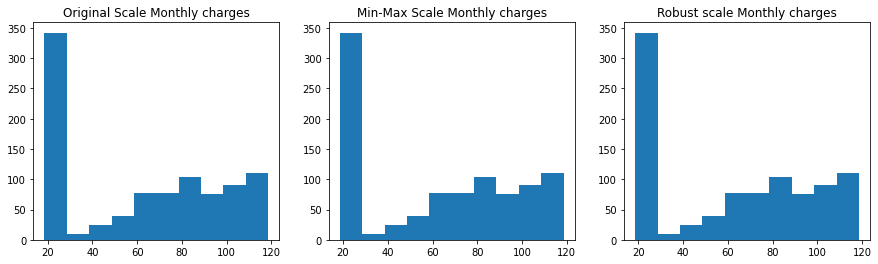

In [13]:
mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
mmX_validate_scaled = pd.DataFrame(mmX_validate_scaled, columns=X_validate.columns)
mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)

rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
rX_validate_scaled = pd.DataFrame(rX_validate_scaled, columns=X_validate.columns)
rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.hist(train.monthly_charges)
plt.title("Original Scale Monthly charges")
plt.subplot(132)
plt.hist(mmX_train_scaled.monthly_charges)
plt.title("Min-Max Scale Monthly charges")
plt.subplot(133)
plt.hist(rX_train_scaled.monthly_charges)
plt.title("Robust scale Monthly charges")
plt.show()

In [ ]:
#3